MATHIAS RAMIREZ;GIULIANO GRACIA;ENZO PERRUCHINO

In [71]:

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf


In [72]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, mean_absolute_percentage_error,max_error
from tensorflow.keras.models import load_model,model_from_json
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.metrics import mean_squared_error, mean_absolute_error
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [95]:
ruta='NuevoTPIA.csv'
demanda=pd.read_csv(ruta)
demanda.head()


,Fecha,SIN Imputed,T02M,RH2M,PRSS,TPP6,U10M,V10M
0,2008-01-01 00:00:00-03:00,877.658352,24.463579,96.798320,999.585909,0.000629,-1.613880,-1.142420
1,2008-01-01 01:00:00-03:00,855.606858,24.314531,96.065988,999.059392,0.000419,-1.624135,-1.256589
2,2008-01-01 02:00:00-03:00,803.357910,24.165483,95.333657,998.532875,0.000210,-1.634390,-1.370759
3,2008-01-01 03:00:00-03:00,750.530366,24.016435,94.601325,998.006359,0.000000,-1.644645,-1.484929
4,2008-01-01 04:00:00-03:00,729.029900,23.667572,94.257455,998.982867,0.000000,-1.273453,-1.629541


In [74]:
demanda["Fecha"] = pd.to_datetime(demanda["Fecha"],format="%Y-%m-%d %H:%M:%S%z", utc=True)
demanda.set_index("Fecha", inplace=True)
demanda.head()
    ##SIN imputed demanda
    ##t02m temperatura
    ##rh2m humedad
    ##prss presion
    ##tpp6 precipitacion
    ##series temporales de la lluvia
    ## u10m y v10m


,SIN Imputed,T02M,RH2M,PRSS,TPP6,U10M,V10M
Fecha,,,,,,,
2008-01-01 03:00:00+00:00,877.658352,24.463579,96.798320,999.585909,0.000629,-1.613880,-1.142420
2008-01-01 04:00:00+00:00,855.606858,24.314531,96.065988,999.059392,0.000419,-1.624135,-1.256589
2008-01-01 05:00:00+00:00,803.357910,24.165483,95.333657,998.532875,0.000210,-1.634390,-1.370759
2008-01-01 06:00:00+00:00,750.530366,24.016435,94.601325,998.006359,0.000000,-1.644645,-1.484929
2008-01-01 07:00:00+00:00,729.029900,23.667572,94.257455,998.982867,0.000000,-1.273453,-1.629541


In [75]:
print(demanda.index.dtype)

datetime64[ns, UTC]


In [76]:

demanda_diaria = demanda.resample('D').sum()
demanda_diaria.head()

,SIN Imputed,T02M,RH2M,PRSS,TPP6,U10M,V10M
Fecha,,,,,,,
2008-01-01 00:00:00+00:00,14069.228982,564.978135,1737.200518,20991.392082,0.017829,-27.461521,-35.717315
2008-01-02 00:00:00+00:00,22678.107216,659.518311,1978.869697,23952.821253,0.017571,-30.221475,-22.807200
2008-01-03 00:00:00+00:00,24902.645117,674.482171,2035.480151,23994.106118,0.031497,-11.514057,-39.304531
2008-01-04 00:00:00+00:00,24320.730423,661.803390,2133.736853,24060.076122,0.070734,-16.572072,15.887627
2008-01-05 00:00:00+00:00,22332.779672,665.823143,1849.500703,24042.238498,0.005508,-23.208824,45.965160


Año 2008: DatetimeIndex(['2008-01-19 12:00:00+00:00'], dtype='datetime64[ns, UTC]', name='Fecha', freq=None)
Año 2009: DatetimeIndex(['2009-01-15 12:00:00+00:00'], dtype='datetime64[ns, UTC]', name='Fecha', freq=None)
Año 2010: DatetimeIndex(['2010-01-07 12:00:00+00:00'], dtype='datetime64[ns, UTC]', name='Fecha', freq=None)
Año 2011: DatetimeIndex(['2011-11-06 00:00:00+00:00'], dtype='datetime64[ns, UTC]', name='Fecha', freq=None)
Año 2012: DatetimeIndex(['2012-03-26 18:00:00+00:00'], dtype='datetime64[ns, UTC]', name='Fecha', freq=None)
Año 2013: DatetimeIndex(['2013-09-22 06:00:00+00:00'], dtype='datetime64[ns, UTC]', name='Fecha', freq=None)
Año 2014: DatetimeIndex(['2014-04-09 12:00:00+00:00'], dtype='datetime64[ns, UTC]', name='Fecha', freq=None)
Año 2015: DatetimeIndex(['2015-04-04 18:00:00+00:00'], dtype='datetime64[ns, UTC]', name='Fecha', freq=None)
Año 2016: DatetimeIndex(['2016-03-24 12:00:00+00:00'], dtype='datetime64[ns, UTC]', name='Fecha', freq=None)
Año 2017: DatetimeI

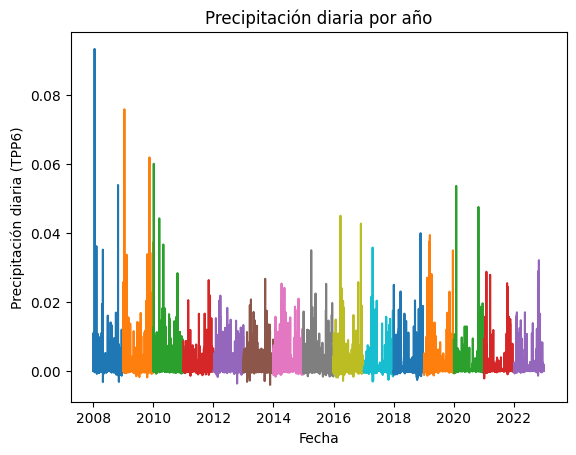

In [94]:

for anho in range(2008, 2023):
    aux = demanda[demanda.index.year == anho]
    plt.plot(aux.index, aux['TPP6'], label=f'{anho}')
    max_date = aux[aux['TPP6'] == aux['TPP6'].max()].index
    print(f"Año {anho}: {max_date}")
plt.xlabel('Fecha')
plt.ylabel('Precipitación diaria (TPP6)')
plt.title('Precipitación diaria por año')
plt.show()    
    

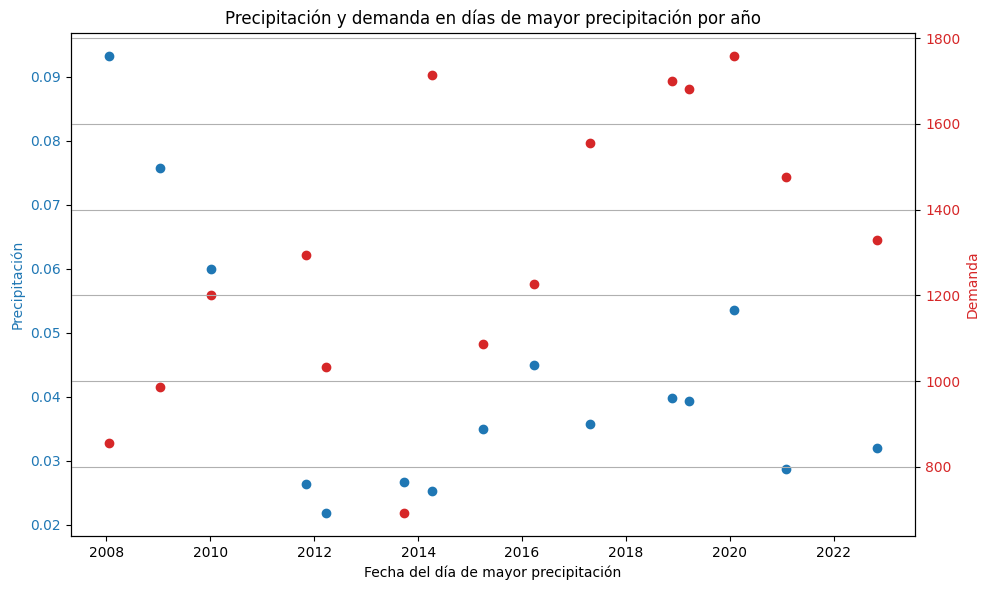

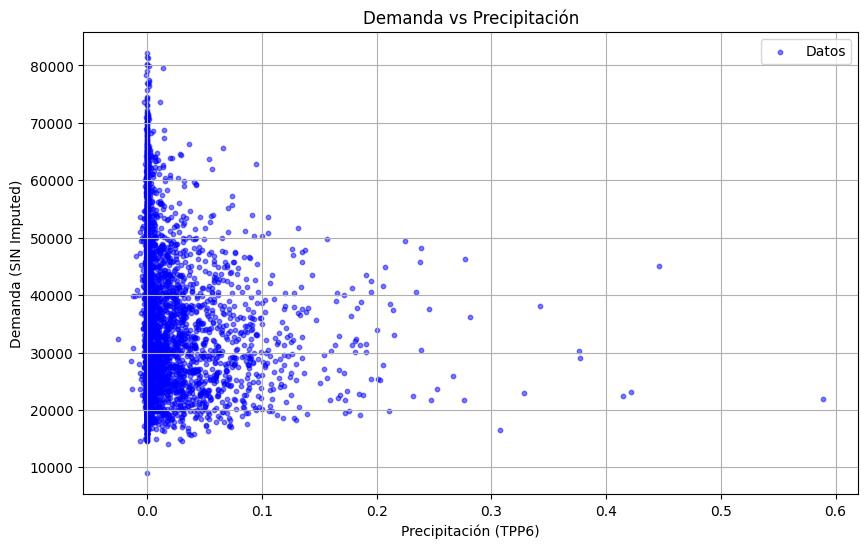

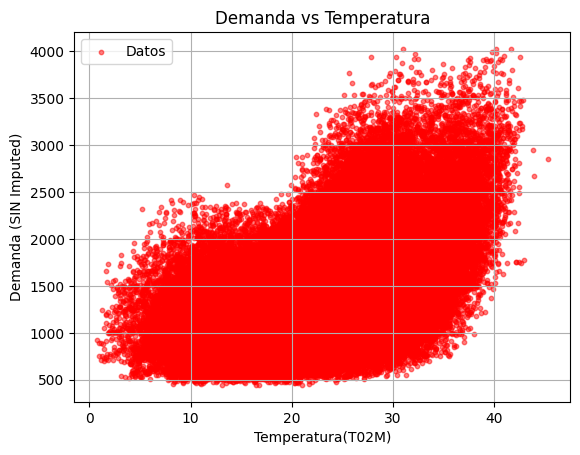

Coeficiente de correlación de Pearson entre la demanda y la precipitacion es : -0.086480375788771
Coeficiente de correlación de Pearson entre la demanda y la temperatura es: 0.5589439367955766


In [84]:
# Crear listas para almacenar los datos
fechas_max_precipitacion = []
precipitaciones_max = []
demandas_max = []

# Iterar sobre los años
for anho in range(2008, 2023):
    # Filtrar los datos para el año actual
    datos_anho = demanda[demanda.index.year == anho]
    # Encontrar el día de máxima precipitación para este año
    max_precipitacion_fecha = datos_anho['TPP6'].idxmax()
    # Guardar la fecha y los valores de precipitación y demanda correspondientes
    fechas_max_precipitacion.append(max_precipitacion_fecha)
    precipitaciones_max.append(datos_anho.loc[max_precipitacion_fecha, 'TPP6'])
    demandas_max.append(datos_anho.loc[max_precipitacion_fecha, 'SIN Imputed'])

# Crear la figura y los ejes
fig, ax1 = plt.subplots(figsize=(10, 6))
# Graficar la precipitación en el primer eje Y
color = 'tab:blue'
ax1.set_xlabel('Fecha del día de mayor precipitación')
ax1.set_ylabel('Precipitación', color=color)
ax1.scatter(fechas_max_precipitacion, precipitaciones_max, color=color, label='Precipitación')
ax1.tick_params(axis='y', labelcolor=color)
# Crear el segundo eje Y
ax2 = ax1.twinx()
# Graficar la demanda en el segundo eje Y
color = 'tab:red'
ax2.set_ylabel('Demanda', color=color)
ax2.scatter(fechas_max_precipitacion, demandas_max, color=color, label='Demanda')
ax2.tick_params(axis='y', labelcolor=color)
# Título y leyenda
plt.title('Precipitación y demanda en días de mayor precipitación por año')
fig.tight_layout()
plt.xticks(rotation=45)
plt.grid(True)
plt.show()
# Crear el gráfico de dispersión
plt.figure(figsize=(10, 6))
plt.scatter(demanda_diaria['TPP6'], demanda_diaria['SIN Imputed'], alpha=0.5, s=10, c='blue', label='Datos')
plt.title('Demanda vs Precipitación')
plt.xlabel('Precipitación (TPP6)')
plt.ylabel('Demanda (SIN Imputed)')
plt.legend()
plt.grid(True)
plt.show()
plt.scatter(demanda['T02M'], demanda['SIN Imputed'], alpha=0.5, s=10, c='red', label='Datos')
plt.title('Demanda vs Temperatura')
plt.xlabel('Temperatura(T02M)')
plt.ylabel('Demanda (SIN Imputed)')
plt.legend()
plt.grid(True)
plt.show()
correlation = demanda_diaria['TPP6'].corr(demanda_diaria['SIN Imputed'])
print(f'Coeficiente de correlación de Pearson entre la demanda y la precipitacion es : {correlation}')
correlation2 = demanda_diaria['T02M'].corr(demanda_diaria['SIN Imputed'])
print(f'Coeficiente de correlación de Pearson entre la demanda y la temperatura es: {correlation2}')

In [64]:
# Supongamos que quieres ver los datos para la fecha '2023-05-15'
fecha_especifica = '2008-01-19'
fecha_especifica2 = '2009-01-15'
# Utiliza .loc[] para acceder a los datos de la fecha específica
datos_fecha_especifica = demanda_diaria.loc[fecha_especifica]

# Imprime los datos
print("Datos para la fecha", fecha_especifica)
print(datos_fecha_especifica)
fecha_especifica = '2022-10-31'

datos_fecha_especifica2 = demanda_diaria.loc[fecha_especifica2]

# Imprime los datos
print("Datos para la fecha", fecha_especifica2)
print(datos_fecha_especifica2)

Datos para la fecha 2008-01-19
SIN Imputed    21986.255960
T02M             611.051733
RH2M            2273.360511
PRSS           23909.504215
TPP6               0.588996
U10M               0.534888
V10M             -11.492396
Name: 2008-01-19 00:00:00+00:00, dtype: float64
Datos para la fecha 2009-01-15
SIN Imputed    22422.273986
T02M             612.567823
RH2M            2178.534221
PRSS           23959.883827
TPP6               0.414686
U10M             -14.164283
V10M             -19.125052
Name: 2009-01-15 00:00:00+00:00, dtype: float64


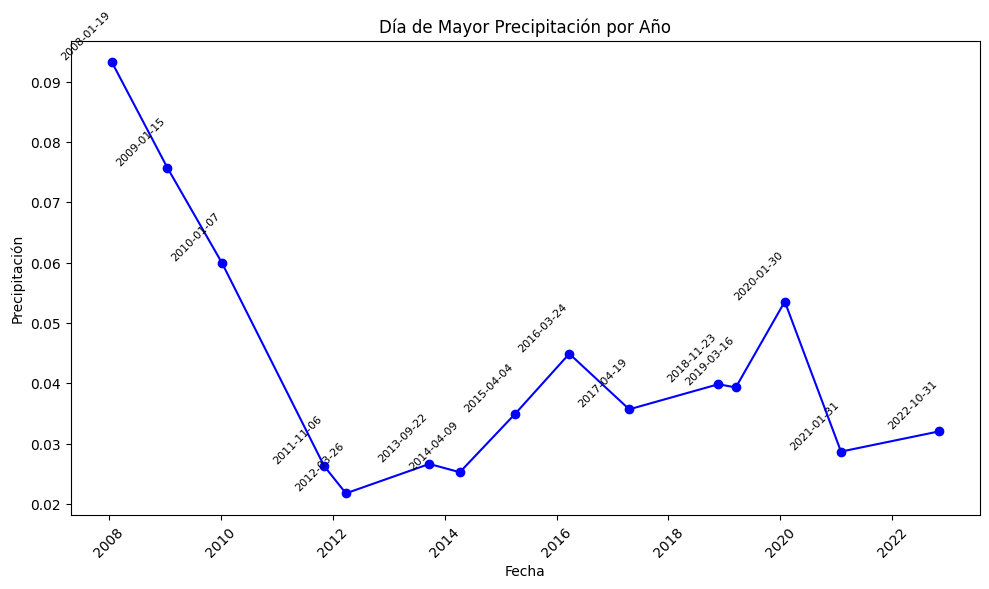

In [85]:

# Inicializar listas para almacenar las fechas de mayor precipitación y los valores correspondientes
fechas_max_precipitacion = []
valores_max_precipitacion = []
# Encontrar el día de mayor precipitación por año
for anho in range(2008, 2023):
    aux = demanda[demanda.index.year == anho]
    max_date = aux[aux['TPP6'] == aux['TPP6'].max()].index[0]
    max_value = aux.loc[max_date, 'TPP6']
    fechas_max_precipitacion.append(max_date)
    valores_max_precipitacion.append(max_value)

# Graficar el día de mayor precipitación por año
plt.figure(figsize=(10, 6))
plt.plot(fechas_max_precipitacion, valores_max_precipitacion, marker='o', linestyle='-', color='b')

# Agregar etiquetas con la fecha exacta en los puntos del gráfico
for i, fecha in enumerate(fechas_max_precipitacion):
    plt.text(fecha, valores_max_precipitacion[i], str(fecha.date()), fontsize=8, ha='right', va='bottom', rotation=45)

plt.title('Día de Mayor Precipitación por Año')
plt.xlabel('Fecha')
plt.ylabel('Precipitación')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [6]:
# SOLO PRECIPITACION
# Preparación de los datos
X = demanda_diaria['TPP6'].values.reshape(-1, 1)  # Característica predictora: precipitación
y = demanda_diaria['SIN Imputed'].values           # Variable objetivo: demanda

# Agregar polinomios y/o interacciones si se desea
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X)

# División en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)

# Escalado de características
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#Construcción del modelo
model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, input_dim=X_train_scaled.shape[1], activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='linear')
])

# Compilación del modelo
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Entrenamiento del modelo
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)
history = model.fit(X_train_scaled, y_train, validation_split=0.2, epochs=100, batch_size=32, callbacks=[early_stopping], verbose=1)

# Evaluación del modelo
loss, mae = model.evaluate(X_test_scaled, y_test)
print(f'MAE en el conjunto de prueba: {mae}')

# Predicciones
y_pred = model.predict(X_test_scaled)

# Métricas adicionales
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'MSE: {mse}')
print(f'R2 Score: {r2}')

# Guardado del modelo
model.save('modelo_demanda_prediccion.keras')

Epoch 1/100


c:\Users\MSI\Downloads\IA\.venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1327072896.0000 - mae: 34640.7617 - val_loss: 1337987072.0000 - val_mae: 34748.6328
Epoch 2/100
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1304698624.0000 - mae: 34249.6172 - val_loss: 1087014912.0000 - val_mae: 30936.9941
Epoch 3/100
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 923344064.0000 - mae: 27850.9727 - val_loss: 324427328.0000 - val_mae: 14359.3623
Epoch 4/100
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 236512656.0000 - mae: 11863.5264 - val_loss: 141299360.0000 - val_mae: 9441.4521
Epoch 5/100
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 147116256.0000 - mae: 9525.2920 - val_loss: 136115440.0000 - val_mae: 9272.2266
Epoch 6/100
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 151727536.0000 - mae: 9627.6611 - val_loss: 133661968.0000 - val_mae: 9206.4072
Epoch 7/100
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 140599408.0000 - mae: 9405.2012 - val_loss: 132175120.0000 - val_mae: 9165.0449
Epoch 8/100
11

In [16]:
# Supongamos que tienes un valor de precipitación de 0.082
valor_precipitacion = 0.017571

# Escalar el valor de precipitación utilizando el escalador
valor_precipitacion_escalado = scaler.transform(np.array([[valor_precipitacion]]))

# Hacer la predicción de demanda
demanda_predicha_escalada = model.predict(valor_precipitacion_escalado)

# Desescalar la predicción de demanda
demanda_predicha = scaler.inverse_transform(demanda_predicha_escalada)

# Imprimir la predicción de demanda
print(f"La demanda predicha para una precipitación de {valor_precipitacion} es: {demanda_predicha[0][0]}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
La demanda predicha para una precipitación de 0.017571 es: 1186.891845703125


In [90]:
#CON PRECIPITACION Y HUMEDAD
# Preparación de los datos
X = demanda_diaria[['TPP6', 'RH2M']]
y = demanda_diaria['SIN Imputed'].values           # Variable objetivo: demanda

# Agregar polinomios y/o interacciones si se desea
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X)

# División en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)

# Escalado de características
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#Construcción del modelo
model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, input_dim=X_train_scaled.shape[1], activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='linear')
])

# Compilación del modelo
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Entrenamiento del modelo
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)
history = model.fit(X_train_scaled, y_train, validation_split=0.2, epochs=100, batch_size=32, callbacks=[early_stopping], verbose=1)

# Evaluación del modelo
loss, mae = model.evaluate(X_test_scaled, y_test)
print(f'MAE en el conjunto de prueba: {mae}')

# Predicciones
y_pred = model.predict(X_test_scaled)

# Métricas adicionales
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'MSE: {mse}')
print(f'R2 Score: {r2}')

# Guardado del modelo
model.save('modelo_demanda_prediccion.keras')

Epoch 1/100


c:\Users\MSI\Downloads\IA\.venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1337860736.0000 - mae: 34740.5430 - val_loss: 1312540928.0000 - val_mae: 34397.4531
Epoch 2/100
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1236953088.0000 - mae: 33161.2852 - val_loss: 715385280.0000 - val_mae: 24483.1289
Epoch 3/100
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 476662624.0000 - mae: 18785.8789 - val_loss: 167419600.0000 - val_mae: 9614.4609
Epoch 4/100
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 166501504.0000 - mae: 9680.7051 - val_loss: 146297744.0000 - val_mae: 9062.2305
Epoch 5/100
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 146746688.0000 - mae: 9085.4316 - val_loss: 134446896.0000 - val_mae: 8759.0264
Epoch 6/100
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 132712960.0000 - mae: 8768.1113 - val_loss: 124750568.0000 - val_mae: 8472.5830
Epoch 7/100
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 124913048.0000 - mae: 8591.1504 - val_loss: 115920384.0000 - val_mae: 8193.3750
Epoch 8/100
110/1

In [92]:
# CON PRECIPITACION HUMEDAD Y PRESION
# Preparación de los datos
X = demanda_diaria[['TPP6', 'RH2M','PRSS']]
y = demanda_diaria['SIN Imputed'].values           # Variable objetivo: demanda

# Agregar polinomios y/o interacciones si se desea
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X)

# División en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)

# Escalado de características
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#Construcción del modelo
model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, input_dim=X_train_scaled.shape[1], activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='linear')
])

# Compilación del modelo
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Entrenamiento del modelo
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)
history = model.fit(X_train_scaled, y_train, validation_split=0.2, epochs=100, batch_size=32, callbacks=[early_stopping], verbose=1)

# Evaluación del modelo
loss, mae = model.evaluate(X_test_scaled, y_test)
print(f'MAE en el conjunto de prueba: {mae}')

# Predicciones
y_pred = model.predict(X_test_scaled)

# Métricas adicionales
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'MSE: {mse}')
print(f'R2 Score: {r2}')

# Guardado del modelo
model.save('modelo_demanda_prediccion.keras')

Epoch 1/100


c:\Users\MSI\Downloads\IA\.venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1354511232.0000 - mae: 34931.5391 - val_loss: 1309967232.0000 - val_mae: 34363.0273
Epoch 2/100
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1250423808.0000 - mae: 33336.6406 - val_loss: 764325760.0000 - val_mae: 25433.6758
Epoch 3/100
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 578904960.0000 - mae: 20806.4004 - val_loss: 224303424.0000 - val_mae: 11552.4648
Epoch 4/100
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 230357344.0000 - mae: 11303.9502 - val_loss: 179326880.0000 - val_mae: 10105.0400
Epoch 5/100
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 201933984.0000 - mae: 10299.4043 - val_loss: 164354768.0000 - val_mae: 9622.4814
Epoch 6/100
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 231816000.0000 - mae: 9991.7578 - val_loss: 152611696.0000 - val_mae: 9290.5176
Epoch 7/100
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 163438944.0000 - mae: 9445.2412 - val_loss: 143018016.0000 - val_mae: 8999.5879
Epoch 8/100
1

In [93]:
# Preparación de los datos
X = demanda_diaria[['TPP6', 'RH2M','PRSS','T02M','U10M','V10M']]
#X = demanda_diaria.drop(columns=['SIN Imputed']) # todas las columnas excepto la demanda
y = demanda_diaria['SIN Imputed'].values           # Variable objetivo: demanda

# Agregar polinomios y/o interacciones si se desea
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X)

# División en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)

# Escalado de características
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#Construcción del modelo
model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, input_dim=X_train_scaled.shape[1], activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='linear')
])

# Compilación del modelo
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Entrenamiento del modelo
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)
history = model.fit(X_train_scaled, y_train, validation_split=0.2, epochs=100, batch_size=32, callbacks=[early_stopping], verbose=1)

# Evaluación del modelo
loss, mae = model.evaluate(X_test_scaled, y_test)
print(f'MAE en el conjunto de prueba: {mae}')

# Predicciones
y_pred = model.predict(X_test_scaled)

# Métricas adicionales
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'MSE: {mse}')
print(f'R2 Score: {r2}')

# Guardado del modelo
model.save('modelo_demanda_prediccion.keras')

Epoch 1/100


c:\Users\MSI\Downloads\IA\.venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1341831424.0000 - mae: 34770.1680 - val_loss: 1294393600.0000 - val_mae: 34158.5508
Epoch 2/100
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1143760512.0000 - mae: 31859.5137 - val_loss: 440870336.0000 - val_mae: 18238.9746
Epoch 3/100
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 303504992.0000 - mae: 14374.6758 - val_loss: 143331712.0000 - val_mae: 9341.4258
Epoch 4/100
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 134643872.0000 - mae: 9100.6797 - val_loss: 104545912.0000 - val_mae: 7813.1748
Epoch 5/100
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 104957872.0000 - mae: 7934.0757 - val_loss: 90043064.0000 - val_mae: 7281.0239
Epoch 6/100
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 110012704.0000 - mae: 7790.9829 - val_loss: 83735232.0000 - val_mae: 7070.5737
Epoch 7/100
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 91777576.0000 - mae: 7343.3677 - val_loss: 80700688.0000 - val_mae: 6947.2114
Epoch 8/100
110/110 ━

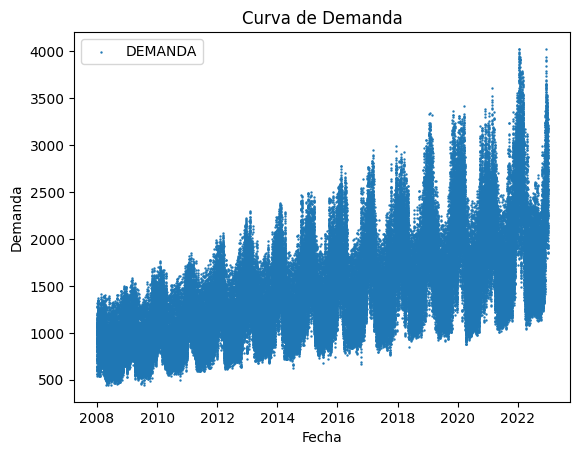

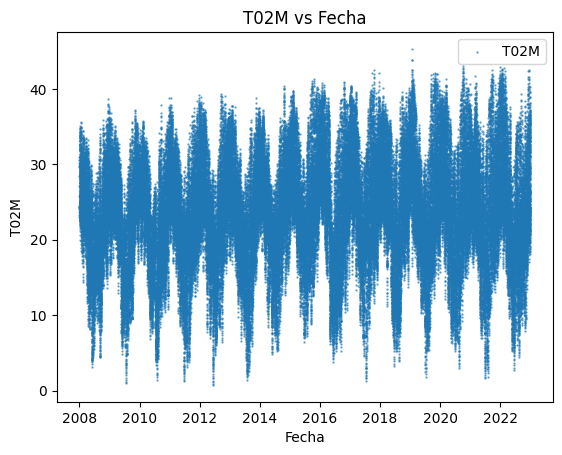

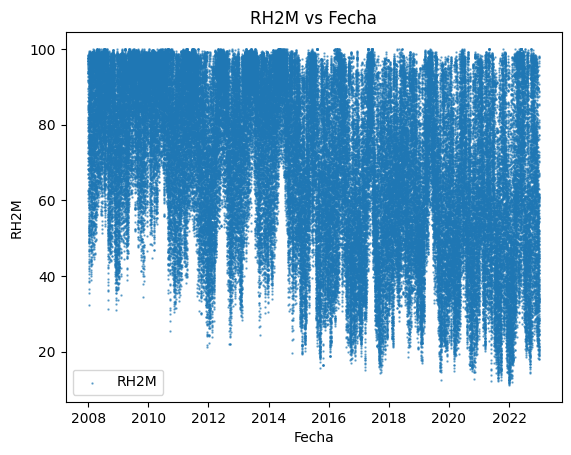

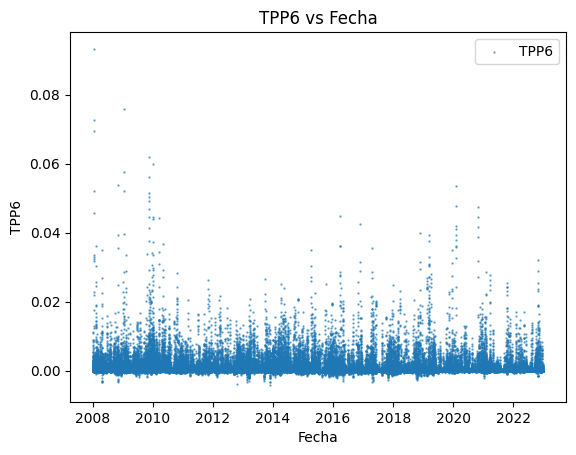

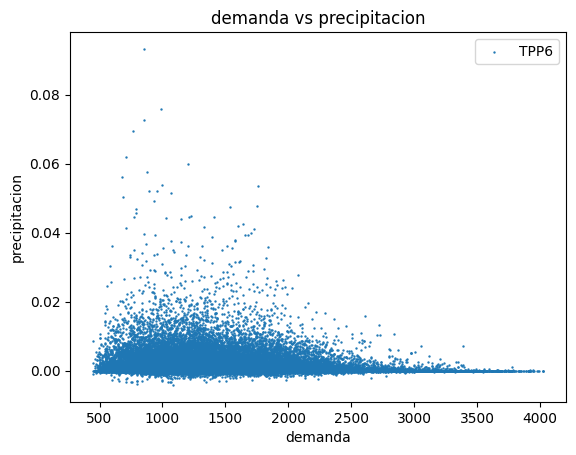

In [13]:
x=demanda.index
y=demanda['SIN Imputed']
y1=demanda['T02M']
y2=demanda['RH2M']
y3=demanda['TPP6']
plt.scatter(x,y,label='DEMANDA',s=0.5)
plt.title('Curva de Demanda')
plt.xlabel('Fecha')
plt.ylabel('Demanda')
plt.legend()
plt.show()
plt.scatter(x,y1,label='T02M',alpha=0.6,s=0.5)
plt.title('T02M vs Fecha')
plt.xlabel('Fecha')
plt.ylabel('T02M')
plt.legend()
plt.show()
plt.scatter(x,y2,label='RH2M',alpha=0.6,s=0.5)
plt.title('RH2M vs Fecha')
plt.xlabel('Fecha')
plt.ylabel('RH2M')
plt.legend()
plt.show()
plt.scatter(x,y3,label='TPP6',alpha=0.6,s=0.5)
plt.title('TPP6 vs Fecha')
plt.xlabel('Fecha')
plt.ylabel('TPP6')
plt.legend()
plt.show()
x2=demanda['SIN Imputed']
plt.scatter(x2,y3,label='TPP6',s=0.5)
plt.title('demanda vs precipitacion')
plt.xlabel('demanda')
plt.ylabel('precipitacion')
plt.legend()
plt.show()



